In [1]:
!nvidia-smi

Tue Nov 25 11:24:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   56C    P5             33W /  350W |    1385MiB /  24576MiB |     37%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#=====================================================

#BLOCK 2

#確保不會出現編碼錯誤(運行時間<1秒) image.png

#=====================================================

In [2]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

#=====================================================

#BLOCK 6

#確認檔案是否成功移動 image.png

#如果資料數量符合下圖數量代表移動成功

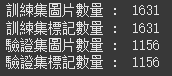

#=====================================================

In [7]:
import os
print('訓練集圖片數量 : ',len(os.listdir("./datasets_0/train/images")))
print('訓練集標記數量 : ',len(os.listdir("./datasets_0/train/labels")))
print('驗證集圖片數量 : ',len(os.listdir("./datasets_0/val/images")))
print('驗證集標記數量 : ',len(os.listdir("./datasets_0/val/labels")))

訓練集圖片數量 :  14926
訓練集標記數量 :  2477
驗證集圖片數量 :  1706
驗證集標記數量 :  310


#### 3. 訓練模型(運行時間約15分鐘)

In [ ]:
from ultralytics import YOLO

# 1. 載入模型（使用官方 yolo11n 預訓練權重）
model = YOLO("yolo11n.pt")

# 2. 用你提供的參數訓練
results = model.train(
    # === 資料集 & 基本訓練設定 ===
    data="./aortic_valve_colab_0.yaml",  # ← 改成你的資料集 yaml
    epochs=1000,
    patience=100,
    batch=16,
    imgsz=640,
    device=0,        # 等同 device=0
    workers=0,
    save=True,
    save_period=50,
    cache=False,
    name="11n",
    exist_ok=False,
    pretrained=True,
    optimizer="auto",
    verbose=True,
    seed=0,
    deterministic=True,
    single_cls=False,
    rect=False,
    cos_lr=False,
    close_mosaic=10,
    resume=False,
    amp=True,
    fraction=1.0,
    profile=False,
    multi_scale=False,

    # === Seg / Mask 相關（如果是純偵測也不會壞） ===
    overlap_mask=True,
    mask_ratio=4,
    dropout=0.0,

    # === 驗證相關 ===
    val=True,
    split="val",
    save_json=False,
    save_hybrid=False,

    # === 匯出/推論一些不太影響訓練的選項（留著不會壞） ===
    vid_stride=1,
    stream_buffer=False,
    augment=False,
    agnostic_nms=False,
    retina_masks=False,
    show=False,
    save_frames=False,
    save_txt=False,
    save_conf=False,
    save_crop=False,
    show_labels=True,
    show_conf=True,
    show_boxes=True,
    format="torchscript",
    keras=False,
    optimize=False,
    int8=False,
    dynamic=False,
    simplify=True,
    workspace=4,
    nms=False,

    # === Optimizer & LR 設定 ===
    lr0=0.001,
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3.0,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,

    # === Loss 權重 ===
    box=8.5,
    cls=0.5,
    dfl=1.5,
    kobj=1.0,
    label_smoothing=0.0,
    nbs=64,

    # === Data Augmentation ===
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=0.0,
    translate=0.1,
    scale=0.5,
    shear=0.0,
    perspective=0.0,
    flipud=0.0,
    fliplr=0.5,
    bgr=0.0,
    mosaic=1.0,
    mixup=0.00,
    copy_paste=0.00,
    copy_paste_mode="flip",
    auto_augment="randaugment",
    erasing=0.4,
    crop_fraction=1.0,

)
